In [1]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
# Importing Random forest regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import datetime as dt
# Dividing the data into train and test datasets
from sklearn.model_selection import train_test_split
# Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
# Importing libraries for Linear Regression, it will use optimum least square estimation method
import statsmodels.api as sm

In [2]:
#Setting data path
os.chdir("D:\Learning\Edwisor Data Science\Final Project 1 Submission")

In [3]:
os.getcwd()

'D:\\Learning\\Edwisor Data Science\\Final Project 1 Submission'

In [9]:
#Import dataset
df_day = pd.read_csv("day.csv")

In [5]:
#Checking no of rows and columns
df_day.head()
#df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
#Delete variable instant since it is nothing but index count
del df_day['instant']
#df_day['registered'].nunique()

In [12]:
#Exploratory Data Analysis
df_day['season'] = df_day['season'].astype('category')
df_day['yr'] = df_day['yr'].astype('category')
df_day['mnth'] = df_day['mnth'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')
df_day['temp'] = df_day['temp'].astype('float')
df_day['atemp'] = df_day['atemp'].astype('float')
df_day['hum'] = df_day['hum'].astype('float')
df_day['windspeed'] = df_day['windspeed'].astype('float')
df_day['dteday'] = df_day['dteday'].astype('category')

In [11]:
#Checking variables at a summary level (BEFORE CONVERSION)
df_day.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#Checking variables at a summary level (AFTER CONVERSION)
df_day.dtypes

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [14]:
#Checking shape of the dataset
df_day.shape
#Dataset has 15 variables and 731 observations

(731, 15)

In [15]:
#Target variable details
df_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

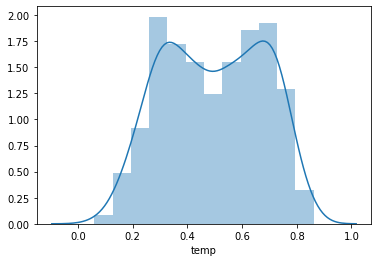

In [16]:
#Checking each variables distribution

sns.distplot(df_day['temp'])
#data seems to be equally distributed

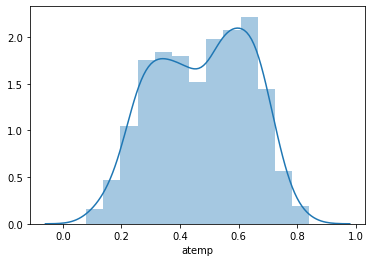

In [17]:
sns.distplot(df_day['atemp'])
#data seems to be equally distributed

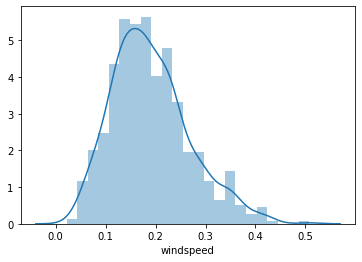

In [18]:
sns.distplot(df_day['windspeed'])
#Possibility of outliers in windspeed variable since data looks left skewed

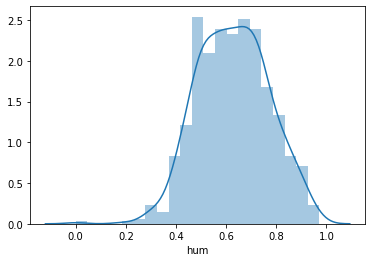

In [19]:
sns.distplot(df_day['hum'])
#Possibility of outliers in windspeed variable since data looks right skewed

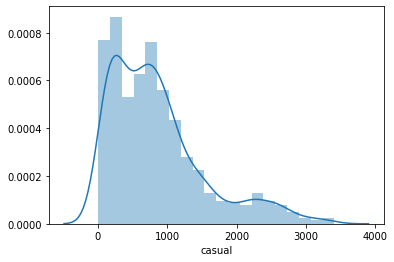

In [20]:
sns.distplot(df_day['casual'])
#Possibility of outliers in windspeed variable since data looks left skewed

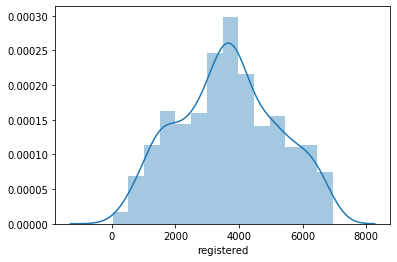

In [21]:
sns.distplot(df_day['registered'])
#data seems to be equally distributed

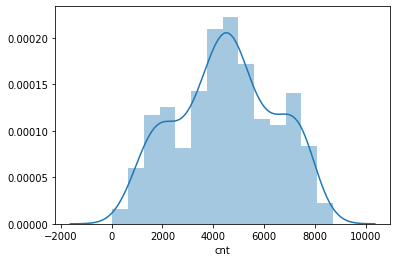

In [22]:
#Checking target variable
sns.distplot(df_day['cnt'])
#Data seems to be uniformly distrbuted

In [23]:
#Checking skewness and kurtosis of target variable
cnt_kurt = df_day['cnt'].kurt()
# -0.8119223847191548

cnt_skew = df_day['cnt'].skew()
# -0.04735278011900183

print(cnt_skew)
print(cnt_kurt)
#As we can see skewness close to 0 less than 0.05 we can say that variable has data equally distributes as we checked 
#above in the plot

-0.04735278011900183
-0.8119223847191548


### Bivariate Analysis ###

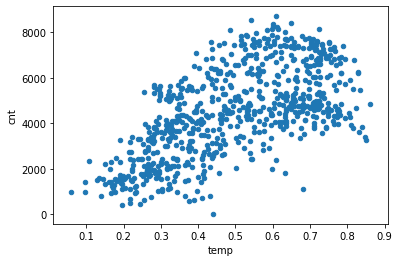

In [25]:
#Lets check the relationship between temp and cnt variable

data = pd.concat([df_day['cnt'], df_day['temp']], axis=1)
data.plot.scatter(x='temp', y='cnt')

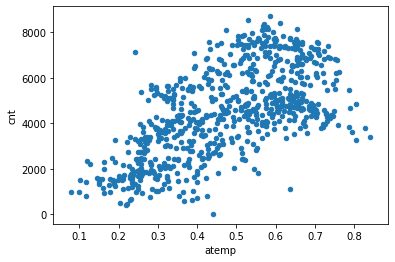

In [26]:
#Lets check the relationship between atemp and cnt variable

data1 = pd.concat([df_day['cnt'], df_day['atemp']], axis = 1)
data1.plot.scatter(x= 'atemp', y = 'cnt')

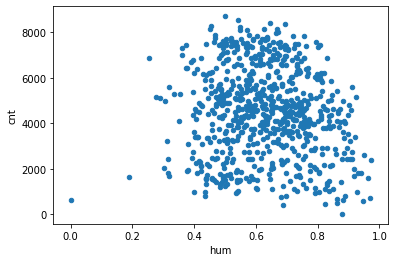

In [27]:
#Lets check the relationship between hum and cnt variable

data2 = pd.concat([df_day['cnt'], df_day['hum']], axis = 1)
data2.plot.scatter(x= 'hum', y = 'cnt')

#It seems that relationship average or right skewed

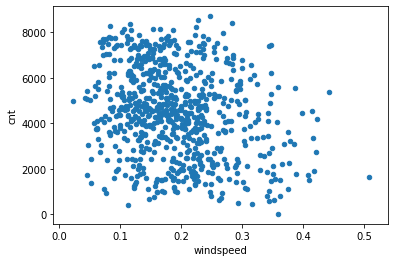

In [28]:
#Lets check the relationship between windspeed and cnt variable

data1 = pd.concat([df_day['cnt'], df_day['windspeed']], axis = 1)
data1.plot.scatter(x= 'windspeed', y = 'cnt')

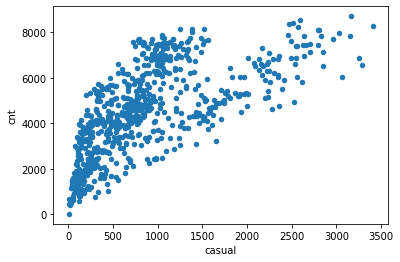

In [29]:
#Lets check the relationship between casual and cnt variable

data1 = pd.concat([df_day['cnt'], df_day['casual']], axis = 1)
data1.plot.scatter(x= 'casual', y = 'cnt')

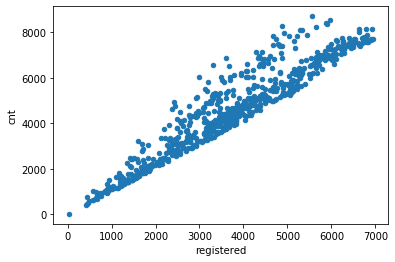

In [30]:
#Lets check the relationship between registered and cnt variable

data1 = pd.concat([df_day['cnt'], df_day['registered']], axis = 1)
data1.plot.scatter(x= 'registered', y = 'cnt')

### MISSING VALUE ANALYSIS  ###

In [31]:
#Checking for missing value analysis
df_missing_value = df_day.isnull().sum()

In [32]:
df_missing_value
#no missin values available we can proceed ahead

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### As we can see there are no missing values in the data we can proceed further.

### OUTLIER ANALYSIS ###

In [33]:
#creating array of variable names of float or int to detect outliers using boxplot
vnames = ["temp", "atemp", "hum", "windspeed","casual","registered"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfe6825808>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfe6825f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfe681ff08>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfe6829ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfe682eec8>],
 'means': []}

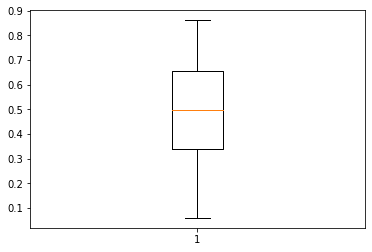

In [34]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['temp'])
# No outliers present in the variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfe6896488>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfe6896d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfe6893a48>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfe689bcc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfe689eb48>],
 'means': []}

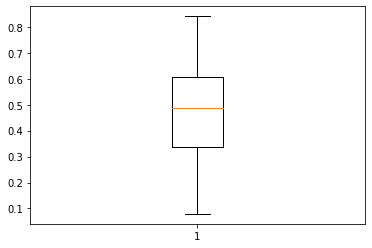

In [35]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['atemp'])
# No outliers present in the variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfe78d1cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfe78d5c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfe78d12c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfe78dac08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfe78dad08>],
 'means': []}

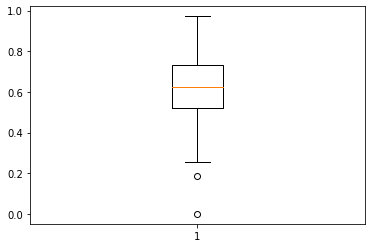

In [36]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['hum'])
# 2 outliers present in the variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfe793c348>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfe793cc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfe7937908>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfe7940b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfe7945a08>],
 'means': []}

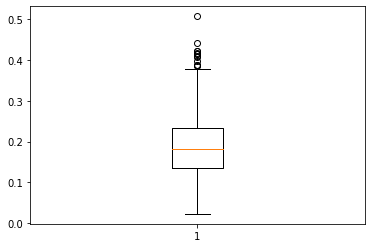

In [37]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['windspeed'])
# 12 outliers present in the variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfea4b2cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfea4b2e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfea4b2448>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfea4bae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfea4baec8>],
 'means': []}

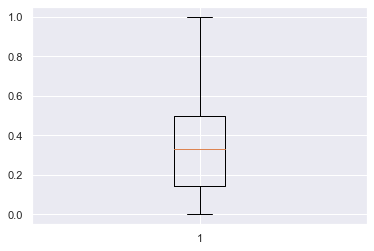

In [86]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['casual'])
# 44 outliers present in the variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfe7a09f88>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfe7a0cf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfe7a09408>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfe7a11a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfe7a15a48>],
 'means': []}

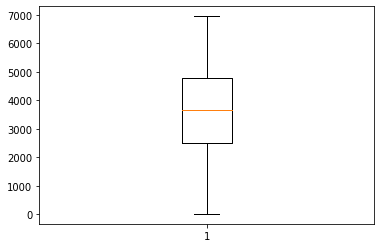

In [39]:
#plotting boxplot of each continuos variable
plt.boxplot(df_day['registered'])
# No outliers present in the variable

In [44]:
#removal procedure of the outliers detected in hum, windspeed, casual

#for hum variable
q75, q25 = np.percentile(df_day.loc[:,'hum'],[75,25])
    
print(q25)
print(q75)

iqr = q75 - q25

print(iqr)

#using formulaes to get min and max range 
min = q25 - (iqr * 1.5)
max = q75 + (iqr * 1.5)

print(min)
print(max)

0.52
0.7302085
0.21020850000000002
0.20468725
1.0455212500000002


In [58]:
#for windspeed variable
q75_2, q25_2 = np.percentile(df_day.loc[:,'windspeed'],[75,25])
    
print(q25_2)
print(q75_2)

iqr_2 = q75_2 - q25_2

print(iqr_2)

#using formulaes to get min and max range 
min_2 = q25_2 - (iqr_2 * 1.5)
max_2 = q75_2 + (iqr_2 * 1.5)

print(min_2)
print(max_2)

0.134329
0.230725
0.09639600000000001
-0.010264999999999996
0.375319


In [67]:
#for casual variable
q75_3, q25_3 = np.percentile(df_day.loc[:,'casual'],[75,25])
    
print(q25_3)
print(q75_3)

iqr_3 = q75_3 - q25_3

print(iqr_3)

#using formulaes to get min and max range 
min_3 = q25_3 - (iqr_3 * 1.5)
max_3 = q75_3 + (iqr_3 * 1.5)

print(min_3)
print(max_3)

292.5
1007.25
714.75
-779.625
2079.375


In [47]:
#creating backup
df_day_bck = df_day.copy()

df_day.shape

(731, 15)

In [48]:
#removing outliers from hum variable
df_day = df_day.drop(df_day[df_day.loc[:,'hum'] < min].index)
df_day = df_day.drop(df_day[df_day.loc[:,'hum'] > max].index)

In [49]:
df_day.shape 
#2 outliers from hum variable are removed as we know previous row count was 731 and now it is 729

(729, 15)

In [59]:
#removing outliers from windspeed variable
df_day = df_day.drop(df_day[df_day.loc[:,'windspeed'] < min_2].index)
df_day = df_day.drop(df_day[df_day.loc[:,'windspeed'] > max_2].index)

In [60]:
df_day.shape
#12 another outliers from windspeed variable are removed as we know previous row count was 729 and now it is 717

(670, 15)

In [68]:
#removing outliers from windspeed variable
df_day = df_day.drop(df_day[df_day.loc[:,'casual'] < min_3].index)
df_day = df_day.drop(df_day[df_day.loc[:,'casual'] > max_3].index)

In [69]:
df_day.shape
#44 another outliers from windspeed variable are removed as we know previous row count was 729 and now it is 717

(652, 15)

# FEATURE SELECTION

In [71]:
############################################# feature  selection   #######################################

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
day_numeric.shape
#(652, 7)

#draw  correlation matrix between all  numeric variables and analyse variables which are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.12,-0.13,0.64,0.55,0.64
atemp,0.99,1.0,0.14,-0.16,0.63,0.55,0.64
hum,0.12,0.14,1.0,-0.21,-0.085,-0.11,-0.12
windspeed,-0.13,-0.16,-0.21,1.0,-0.16,-0.2,-0.21
casual,0.64,0.63,-0.085,-0.16,1.0,0.46,0.65
registered,0.55,0.55,-0.11,-0.2,0.46,1.0,0.97
cnt,0.64,0.64,-0.12,-0.21,0.65,0.97,1.0


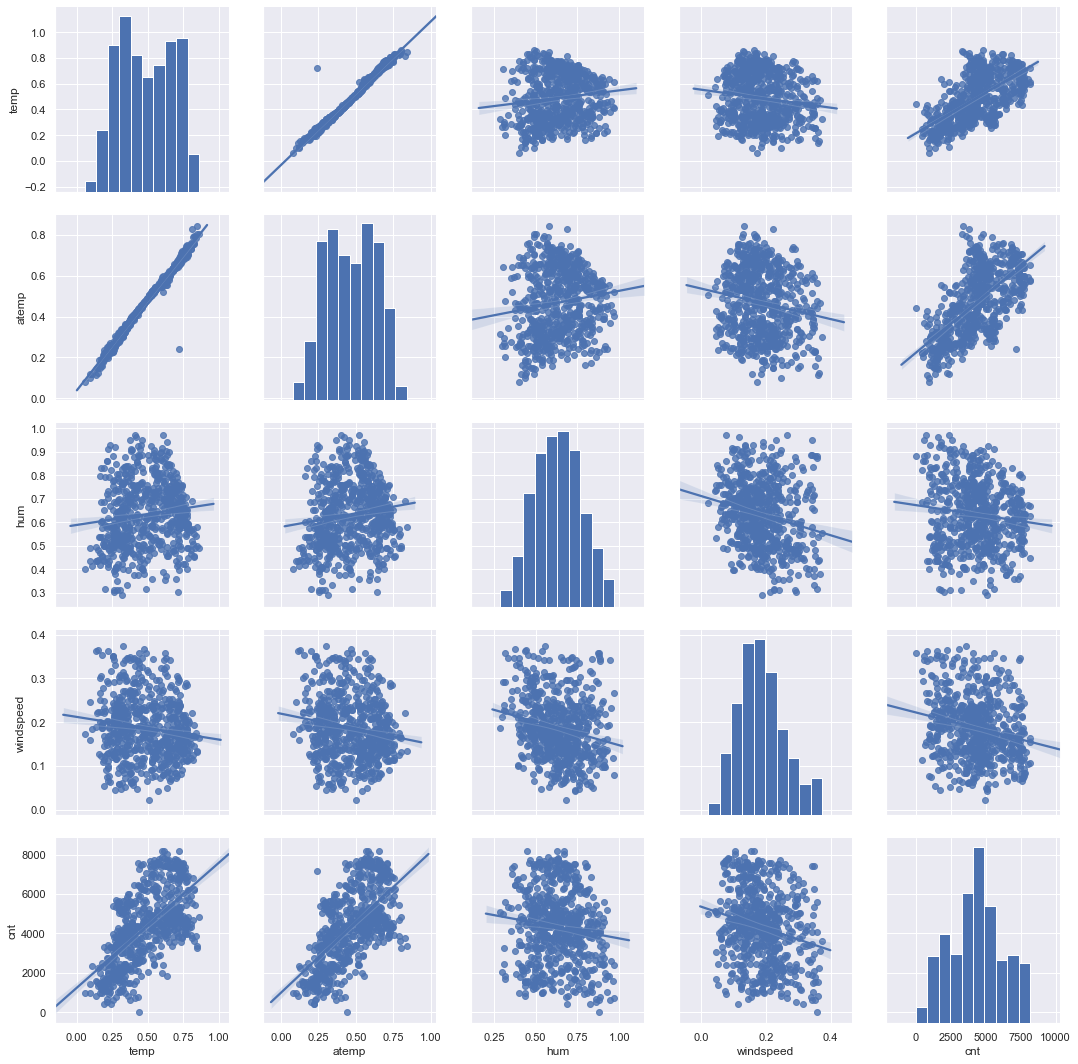

In [73]:
sns.set()
vnames = ['temp','atemp','hum','windspeed','cnt']

sns.pairplot(day_numeric[vnames], height = 3, kind ='reg')
plt.show()

In [74]:
# It seems that Independent variables temp and atemp have similar data so droping one variable.
feature_selected = day_numeric.loc[:,['temp','hum','windspeed','cnt']]

feature_selected.head(1)
# 	temp	hum	windspeed	casual	registered	cnt
# 0	0.344167	0.805833	0.160446	331	654	985

feature_selected.shape
# (652, 4)

#I will drop from main data down because this is only continuos variable df_day will consists of both continuos
#and categorical variable

(652, 4)

### FEATURE SCALING ###

In [75]:
# Normality check

#considerring numerical variables only

cnames = ['casual', 'hum', 'windspeed']

for i in cnames:
    print(i)
    df_day[i] = (df_day[i] - df_day[i].min()) / (df_day[i].max() - df_day[i].min())

# Previously was getting error 'numpy.float64' object is not callable so written below line but automatically error
# got solved strange but true

#(df_backup['casual'] - df_backup['casual'].min()) / (df_backup['casual'].max() - df_backup['casual'].min())

casual
hum
windspeed


In [76]:
#Before Normalization
print(df_day['casual'].min())   # 2
print(df_day['casual'].max())   # 2258

#knowing first observation value
print(df_day['casual'].iloc[0])  # 331

#Manual calculation to double check for 1st variable
(331 - 2) / (2258 - 2)  #0.14583

#After Normalization
print(df_day['hum'].min())   # 0.0
print(df_day['hum'].max())   # 1.0

0.0
1.0
0.16343765524093393
0.0
1.0


In [77]:
#Checking data for final time before proceeding
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.755799,0.392209,0.163438,654,985
1,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.594999,0.642480,0.064083,670,801
2,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.215785,0.641826,0.058619,1229,1349
3,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.440198,0.391783,0.052658,1454,1562
4,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.215322,0.467365,0.039742,1518,1600


In [78]:
#Dropping irrelevant features as we came to know temp and atemp independent variable have similar data

feature_selected_day = df_day.drop(['atemp','casual','registered'], axis = 1)

train, test = train_test_split(feature_selected_day, test_size = 0.2)

In [79]:
# Verifying new dataset feature_selected_day details

print(feature_selected_day.shape)
#(652, 12)

feature_selected_day.head()

(652, 12)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2011,1,0,1,0,6,0,2,0.344167,0.755799,0.392209,985
1,02-01-2011,1,0,1,0,0,0,2,0.363478,0.594999,0.642480,801
2,03-01-2011,1,0,1,0,1,1,1,0.196364,0.215785,0.641826,1349
3,04-01-2011,1,0,1,0,2,1,1,0.200000,0.440198,0.391783,1562
4,05-01-2011,1,0,1,0,3,1,1,0.226957,0.215322,0.467365,1600


In [80]:
# Verifying new dataset train details
print(train.shape)
#(521, 12)

train.head()

(521, 12)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
234,23-08-2011,3,0,8,0,2,1,1,0.640833,0.242369,0.353336,5895
242,31-08-2011,3,0,8,0,3,1,1,0.656667,0.451160,0.173134,5058
437,13-03-2012,1,1,3,0,2,1,1,0.565000,0.479853,0.609556,5847
705,06-12-2012,4,1,12,0,4,1,1,0.255833,0.320513,0.432858,5375
401,06-02-2012,1,1,2,0,1,1,1,0.282609,0.486702,0.373328,3784


In [81]:
# Verifying new dataset test details
print(test.shape)
#(131, 12)

test.head()

(131, 12)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
582,05-08-2012,3,1,8,0,0,0,1,0.769167,0.531136,0.761466,5464
720,21-12-2012,1,1,12,0,5,1,2,0.326667,0.390721,1.000000,3623
89,31-03-2011,2,0,3,0,4,1,3,0.268333,0.920634,0.554713,1685
722,23-12-2012,1,1,12,0,0,0,1,0.245833,0.330281,0.314472,1787
480,25-04-2012,2,1,4,0,3,1,1,0.476667,0.202076,0.273871,6196


### Decision Tree Regressor ###

In [115]:
#Run the model #after trying multiple attempts I came to a decision that max_depth 15 is optimum setting
fit = DecisionTreeRegressor(max_depth = 25, presort=True, max_leaf_nodes=125).fit(train.iloc[:,1:11],train.iloc[:,11])

In [96]:
fit

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=True, random_state=None, splitter='best')

In [116]:
#Apply Model on test data and predict the data
Predictions_DT = fit.predict(test.iloc[:,1:11])

In [98]:
Predictions_DT

array([5531., 3423.,  795., 3333., 6772., 5566., 1796., 5375., 6457.,
       5459., 6457., 3767., 3267., 6457., 4451., 1589., 3855., 6786.,
       7424., 5260.,  431., 5687., 1360., 2177., 6392., 3922.,  683.,
       4375., 1834., 6290., 5895., 1471., 7393., 6241., 4270., 6572.,
       4845., 5743., 1834., 6296.,  431., 4563., 6290., 6457.,  431.,
       4036., 3922., 1461., 2802., 4036., 4509., 1891., 6530., 4845.,
       4274., 1098., 5259., 3333., 5847., 3129., 4773., 3071., 4630.,
       4795., 3894., 7804., 3894., 5686., 7055., 4845., 2493., 1834.,
       6457., 3922., 2895., 6392., 3915., 4648., 3974., 4023., 1098.,
       7713., 4744., 7534., 6241., 6871., 4595., 4381., 5312., 3974.,
       7534., 2077., 5375., 1834., 3243., 3129., 3429., 1098., 4648.,
       5267., 2493.,  441., 4845., 4996., 2077., 5847., 2493., 5895.,
       1450., 3487., 3272., 3053., 2162., 5629., 3403., 5058., 2808.,
       3956., 5918., 5634., 3855., 1851., 3974., 4826., 5315., 3922.,
       3071., 7261.,

In [99]:
#Calculate MAPE 
#defining function
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true)) * 100
    return mape

In [117]:
# Evaluating Decision Tree Output
MAPE(test.iloc[:,11], Predictions_DT)
#15.690

#In first attempt I have taken max_depth = 5 so I received MAPE score as 6.07% which is high so i re-runed making 
#max_depth = 15 so MAPE score decreased and after selecting max_depth = 15 we get MAPE score as 3.47 which is ok.

15.690718392598454

In [101]:
#Calculate RMSE  
def RMSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    print("Mean Square", mse)
    rmse = np.sqrt(mse)
    print("Square Root", rmse)
    return rmse

In [118]:
RMSE(test.iloc[:,11], Predictions_DT)
# 691.38

#Since our dataset is not transactional we will discard RMSE Value since it will not make sense

Mean Square 478014.27587382786
Square Root 691.3857648764746


691.3857648764746

### Random Forest ###

In [145]:
# Implementing Random Forest
RF_model = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth=25, random_state = 150).fit(train.iloc[:,1:11],train.iloc[:,11])

In [127]:
print(RF_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=150,
                       verbose=0, warm_start=False)


In [146]:
# Predicting Test Cases
RF_Predictions = RF_model.predict(test.iloc[:,1:11])

In [123]:
print(RF_Predictions)

[6031 2114 1865  754 6772 5259 3243 5008 6572 4066 5532 6034 2703 6457
 4058 1600 4010 6241 7424 7328 1204 3285 3409 1341 6606 4154  683 4375
 1461 6966 5515 1162 8167 6660 4270 6457 4845 7040 1834 6784 2294 4563
 5115 7534 1891 2895 4579 2927 3333 4098 1461 2028 6530 4845 4826 2298
 3071 3095 4862 1812 5459 4570 6421 4795 4484 7466 2933 5686 6273 4845
 1605 2376 5992 4521 3740 7444 3915 4266 4094 4154 2236 7350 4744 6779
 6211 6871 3249  627 5119 4109 7534 4451 5686 3831 2496 3129 2034 1248
 4342 5259 3272 2376 6879 5572 2034 6093 1510 5362 2236 3487 4509 4046
 1162 2424 3403 5895 2999 3784 4322 5008 3855 2496 4046 4765 6233 2294
 4187 7350 1416 5020 6053]


In [147]:
# Evaluating Random Forest Model
MAPE(test.iloc[:,11], RF_Predictions)
# 21.564

# At first I got MAPE as 14.98 when estimators was 100 after re tuning model by selecting estimators as 700 we get 12.36
# which seems ok.

21.56477795676102

In [148]:
RMSE(test.iloc[:,11], RF_Predictions) 
# 899.173
#Since our dataset is not transactional we will discard RMSE Value since it will not make sense

Mean Square 808513.5801526718
Square Root 899.1738319995037


899.1738319995037

### LINEAR REGRESSION ###

In [150]:
# Train the model using the training sets
model = sm.OLS(train.iloc[:,11], train.iloc[:,8:11]).fit()

In [152]:
#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              1591.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):                   7.41e-261
Time:                        22:27:52   Log-Likelihood:                         -4541.5
No. Observations:                 521   AIC:                                      9089.
Df Residuals:                     518   BIC:                                      9102.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp        8435.2700    293.105     28.779      0.000    7859.449    9011.091
hum         -294.8920    265.373     -1.111      0.267    -816.231     226.447
windspeed    390.8130    253.198      1.544      0.123    -106.608     888.235
==============================================================================
Omnibus:                        5.544   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.984
Skew:                           0.065   Prob(JB):                        0.136
Kurtosis:                       2.592   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,8:11])

In [154]:
# Calculate MAPE
MAPE(test.iloc[:,11],predictions_LR)
# 35.807

35.80785237719758

In [155]:
# Calculate RMSE
RMSE(test.iloc[:,11], predictions_LR) 
#Since our dataset is not transactional we will discard RMSE Value since it will not make sense

Mean Square 2397329.588384387
Square Root 1548.3312269615915


1548.3312269615915

### CONCLUSION ###

In [91]:
#Changing directory to save all files in output folder
os.chdir("D:\Edwisor Data Science\Final Project 1 Submission\Output")

In [93]:
os.getcwd()

'D:\\Edwisor Data Science\\Final Project 1 Submission\\Output'

In [ ]:
# As per above models since Decision Tree has the lowest MAPE value of 15.690% which is great as compared to other models
# and RMSE is 691.38 so we can proceed with Decision Tree model as it is most accurate amongst the other two.

In [119]:
#Generating output file Linear Regression

LR_Output_df = pd.DataFrame(predictions_LR)

LR_Output_df = LR_Output_df.rename(columns = {0 : 'Linear_Regression_Output'})

LR_Output_df.to_csv("LR_Output_Pred_Python.csv", header = True, index = False)

In [109]:
#Generating output file Random Forest
RF_Output_df = pd.DataFrame(RF_Predictions)

RF_Output_df = RF_Output_df.rename(columns = {0 : 'Random_Forest_Output'})

RF_Output_df.to_csv("RF_Output_Pred_Python.csv", index = True, header = True)

In [113]:
#Generating output file Decision Tree
DF_Output_df = pd.DataFrame(Predictions_DT)

DF_Output_df = DF_Output_df.rename(columns = {0 : 'Decision_Tree_Output'})

DF_Output_df.to_csv("DF_Output_Pred_Python.csv", index = True, header = True)